Setup environment

In [1]:
# Make sure src folder is importable
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Optional: auto-reload changes in .py files
%load_ext autoreload
%autoreload 2

Import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data.data_loader import CryptoDataLoader
from src.data.feature_engineering import FeatureEngineer

Load data

In [3]:
# Initialize the data loader
loader = CryptoDataLoader(data_dir="data/raw")

# Load BTC-USD historical data (already saved CSV)
df = loader.load_saved_data(
    ticker="BTC-USD",
    start_date="2024-01-01",
    end_date="2025-01-01"
)

# Quick check
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-01 00:00:00+00:00,42280.234375,44175.437500,42214.976562,44167.332031,18426978443,0.0,0.0
2024-01-02 00:00:00+00:00,44187.140625,45899.707031,44176.949219,44957.968750,39335274536,0.0,0.0
2024-01-03 00:00:00+00:00,44961.601562,45503.242188,40813.535156,42848.175781,46342323118,0.0,0.0
2024-01-04 00:00:00+00:00,42855.816406,44770.023438,42675.175781,44179.921875,30448091210,0.0,0.0
2024-01-05 00:00:00+00:00,44192.980469,44353.285156,42784.718750,44162.691406,32336029347,0.0,0.0


Add technical indicators

In [4]:
fe = FeatureEngineer()

df_features = fe.add_technical_indicators(df)

# Inspect the new features
df_features.head()

j:\Data Science\crypto_forecasting\venv\Lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in scalar divide
  dip[idx] = 100 * (self._dip[idx] / value)
j:\Data Science\crypto_forecasting\venv\Lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in scalar divide
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,rsi,stoch,stoch_signal,...,bollinger_width,atr,obv,vwap,price_change,log_return,volatility,day_of_week,month,quarter
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-03 00:00:00+00:00,43184.964844,43359.941406,42890.808594,42992.250000,11169245236,0.0,0.0,52.741223,84.075847,85.813231,...,4755.121049,1470.322440,-48886472793,41583.758032,-0.004483,-0.004493,0.021348,5,2,1
2024-02-04 00:00:00+00:00,42994.941406,43097.644531,42374.832031,42583.582031,14802225490,0.0,0.0,49.910895,76.389857,82.727614,...,4762.948725,1416.928873,-63688698283,41638.314376,-0.009506,-0.009551,0.021544,6,2,1
2024-02-05 00:00:00+00:00,42577.621094,43494.250000,42264.816406,42658.667969,18715487317,0.0,0.0,50.437173,77.802030,79.422578,...,4677.162766,1403.536353,-44973210966,41878.840272,0.001763,0.001762,0.015514,0,2,1
2024-02-06 00:00:00+00:00,42657.390625,43344.148438,42529.019531,43084.671875,16798476726,0.0,0.0,53.426999,82.580887,78.924258,...,4737.069074,1361.507250,-28174734240,42211.194226,0.009986,0.009937,0.015540,1,2,1
2024-02-07 00:00:00+00:00,43090.019531,44341.949219,42775.957031,44318.222656,21126587775,0.0,0.0,60.800854,99.505314,86.629410,...,5143.914349,1376.113317,-7048146465,42524.379864,0.028631,0.028229,0.016679,2,2,1


Plot some indicators

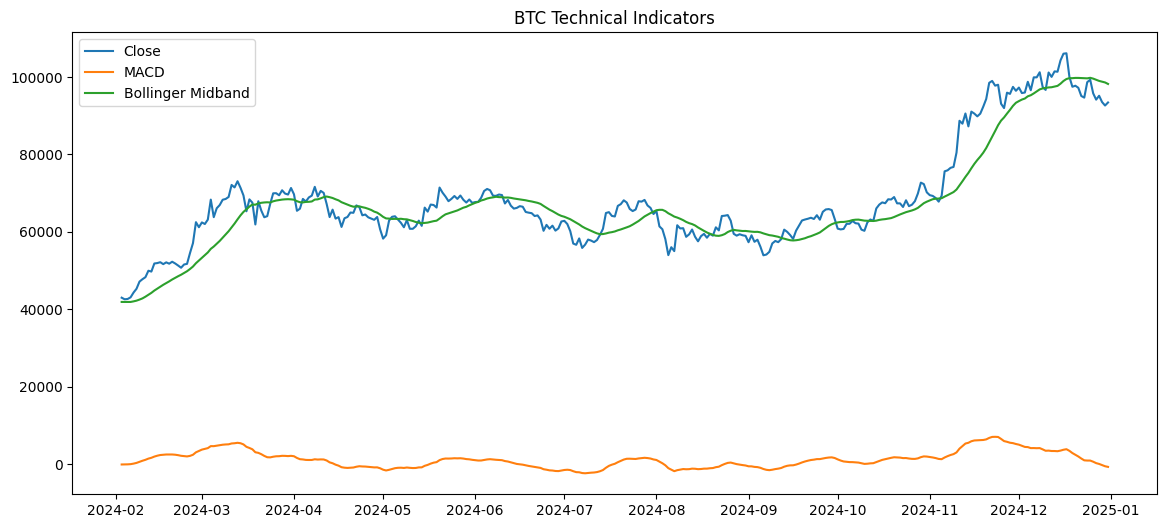

In [5]:
plt.figure(figsize=(14,6))
plt.plot(df_features['Close'], label='Close')
plt.plot(df_features['macd'], label='MACD')
plt.plot(df_features['bollinger_mband'], label='Bollinger Midband')
plt.title("BTC Technical Indicators")
plt.legend()
plt.show()


Normalize features

In [6]:
# Normalize all features
normalized_data = fe.normalize_data(df_features)
print("Normalized shape:", normalized_data.shape)

# Example: inverse transform the first 5 rows
original_data = fe.inverse_transform(normalized_data[:5])
print("First 5 rows after inverse transform:\n", original_data)

Normalized shape: (333, 28)
First 5 rows after inverse transform:
 [[ 4.31849648e+04  4.33599414e+04  4.28908086e+04  4.29922500e+04
   1.11692452e+10  0.00000000e+00  0.00000000e+00  5.27412232e+01
   8.40758468e+01  8.58132311e+01 -9.76332776e+01 -4.31761609e+02
   3.34128331e+02  1.41759712e+01  8.55349082e+01  4.42733138e+04
   3.95181928e+04  4.18957533e+04  4.75512105e+03  1.47032244e+03
  -4.88864728e+10  4.15837580e+04 -4.48316597e-03 -4.49324549e-03
   2.13476960e-02  5.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 4.29949414e+04  4.30976445e+04  4.23748320e+04  4.25835820e+04
   1.48022255e+10  0.00000000e+00  0.00000000e+00  4.99108954e+01
   7.63898572e+01  8.27276145e+01 -8.20962894e+01 -3.61828545e+02
   2.79732256e+02  1.38236271e+01  5.68424714e+01  4.42808083e+04
   3.95178596e+04  4.18993340e+04  4.76294872e+03  1.41692887e+03
  -6.36886983e+10  4.16383144e+04 -9.50561947e-03 -9.55108623e-03
   2.15443022e-02  6.00000000e+00  2.00000000e+00  1.00000000e+00]
 [ 4.25

Create sequences for LSTM/Transformer

X shape: (303, 30, 27)
y shape: (303,)


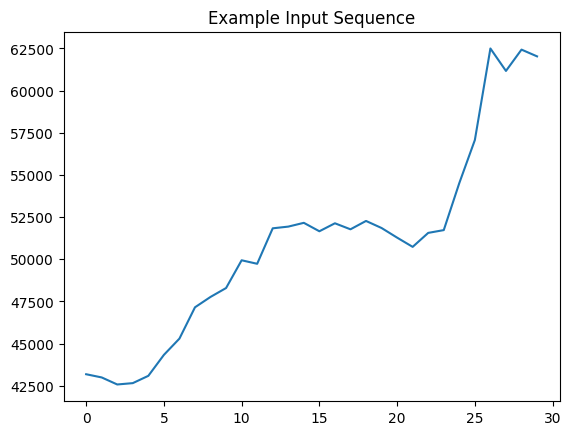

In [7]:
sequence_length = 30  # past 30 days
X, y = fe.create_sequences(df_features, sequence_length=sequence_length, target_col='Close')

print("X shape:", X.shape)
print("y shape:", y.shape)

# Example: plot the first sequence
plt.plot(X[0][:, 0], label='First feature of first sequence')
plt.title("Example Input Sequence")
plt.show()


Add interactive widgets to select ticker or date range

In [9]:
import ipywidgets as widgets
from IPython.display import display

ticker_widget = widgets.Text(value='BTC-USD', description='Ticker:')
display(ticker_widget)

Text(value='BTC-USD', description='Ticker:')